In [2]:
!unzip -q images.zip -d .

In [3]:
import numpy as np
import cv2
import os
from google.colab.patches import cv2_imshow

In [5]:
samples = []
for root, dirs, files in os.walk('images'):
  print('-----', root, '-----')
  print('dirs:', dirs)
  print('files', files)
  if 'neg' in root:
    cat = 0
  elif 'pos' in root:
    cat = 1
  else:
    continue

  for file in files:
    path = os.path.join(root, file)
    image = cv2.imread(path)
    if image is None:
      continue
    samples.append((image, cat ))

print('samples :', len(samples))

----- images -----
dirs: ['sy', 'images', 'neg', 'images_╝█╝Ў┐м', 'pos']
files []
----- images/sy -----
dirs: ['images']
files []
----- images/sy/images -----
dirs: ['neg', 'pos']
files []
----- images/sy/images/neg -----
dirs: []
files ['1361.jpg', '1636.jpg', '1397.jpg', '1490.jpg', '1575.jpg', '1721.jpg', '1159.jpg', '1712.jpg', '1756.jpg', '1798.jpg', '1255.jpg', '1531.jpg', '1312.jpg', '1445.jpg', '1189.jpg']
----- images/sy/images/pos -----
dirs: []
files ['714.jpg', '467.jpg', '769.jpg', '615.jpg', '886.jpg', '1042.jpg', '820.jpg', '451.jpg', '569.jpg', '588.jpg', '537.jpg', '987.jpg', '673.jpg']
----- images/images -----
dirs: ['neg', 'pos']
files []
----- images/images/neg -----
dirs: []
files ['122.jpg', '285.jpg', '124.jpg', '292.jpg', '115.jpg', '125.jpg']
----- images/images/pos -----
dirs: []
files ['182.jpg', '228.jpg', '156.jpg', '218.jpg', '226.jpg', '28.jpg']
----- images/neg -----
dirs: []
files ['151.jpg', '235.jpg', '259.jpg', '314.jpg', '292.jpg', '188.jpg', '382.

In [16]:
def model(sample):
  sample = samples[15][0]
  hsv = cv2.cvtColor(sample, cv2.COLOR_BGR2HSV)
  h, s, v = cv2.split(hsv)
  segment =( 34 < h) & (h < 65) & (s > 70) & (v > 50)
  #cv2_imshow(segment * 255)
  H, W, _ = sample.shape
  P = segment.sum() / (H * W)
  return P

In [13]:
probs = []
for sample, truth in samples:
  p = model(sample)
  probs.append(p)
thres_list = []
acc_list = []

for thres in np.linspace(0.01, 0.4, 100):
  total = 0
  for p, (ample, truth) in zip(probs, samples):
    pred =int(p > thres)
    if pred == truth:
      total +=1
  acc = total / len(samples)
  acc_list.append(acc)
  thres_list.append(thres)


In [18]:
probs = []
for sample, truth in samples:
  prob = model(sample)
  probs.append(prob)

thres_list =[]
acc_list = []
probs = [model(sample) for sample, truth in samples]
probs = np.array(probs)
truths = np.array([truth for sample, truth in samples])

for thres in np.linspace(0.01, 0.4):
  pred = probs > thres
  acc = (pred == truths).mean()

  acc_list.append(acc)
  thres_list.append(thres)



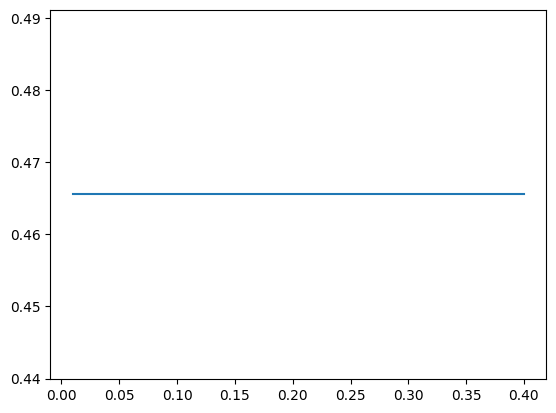

In [19]:
import matplotlib.pyplot as plt
plt.plot(thres_list, acc_list, '-')